In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
angle_file = [0,10,20,30]
df = pd.read_csv('0degree.csv').drop('Unnamed: 0',axis=1)
for i in angle_file[1:] :
    df = df.append(pd.read_csv('{i}degree.csv'.format(i=i)).drop('Unnamed: 0',axis=1))
df = df.reset_index().drop('index',axis=1)
df


,Dxs,Dys,rot
0,161.65,-180.46,0.18
1,161.65,-181.46,-1.02
2,166.27,-185.61,0.20
3,166.27,-186.66,0.05
4,162.67,-180.46,0.11
5,163.98,-183.55,0.05
6,166.27,-185.61,0.07
7,162.67,-180.46,0.23
8,161.65,-180.46,0.42
9,166.27,-186.66,0.17


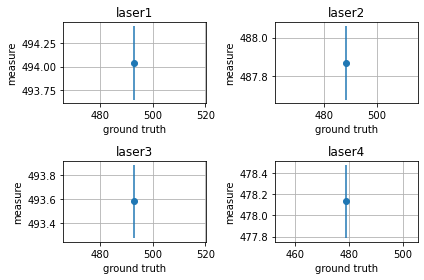

In [44]:
dfl = pd.read_csv('lasers.csv').drop('Unnamed: 0',axis=1)
means = [dfl['laser1'].mean(),dfl['laser2'].mean(),dfl['laser3'].mean(),dfl['laser4'].mean()]
stds = [dfl['laser1'].std(),dfl['laser2'].std(),dfl['laser3'].std(),dfl['laser4'].std()]
xs= [493,488.5,493,479]
fig, axs = plt.subplots(2,2)
axs[0, 0].errorbar(xs[0], means[0],yerr = stds[0],fmt='o')
axs[0, 0].set_title('laser1')
axs[0, 1].errorbar(xs[1], means[1],yerr = stds[1],fmt='o')
axs[0, 1].set_title('laser2')
axs[1, 0].errorbar(xs[2], means[2],yerr = stds[2],fmt='o')
axs[1, 0].set_title('laser3')
axs[1, 1].errorbar(xs[3], means[3],yerr = stds[3],fmt='o')
axs[1, 1].set_title('laser4')
for ax in axs.flat:
    ax.set(xlabel='ground truth', ylabel='measure')
    ax.grid(True)
fig.tight_layout()
plt.savefig('laser_plot.png')

In [47]:
print(means,stds)

[494.03947390847105, 487.86858743187236, 493.57994301491215, 478.1310991681705] [0.38994617258032094, 0.1911945796214425, 0.3082568167935689, 0.3459939550029537]


In [33]:
median = df['rot'][0:10].median()
df['rot'] = df['rot'].apply(lambda x: x-median)
df = df[10:].reset_index().drop('index',axis=1)
df

,Dxs,Dys,rot
0,169.78,-190.62,10.34
1,174.63,-196.07,10.19
2,185.22,-206.85,10.55
3,204.96,-228.75,10.36
4,169.78,-191.64,10.28
5,170.80,-190.62,10.57
6,197.17,-222.55,10.47
7,170.80,-190.62,10.60
8,175.68,-197.12,10.35
9,204.96,-228.75,10.61


In [91]:
def get_error_plot(head):
    
    means = [df[head][0:9].mean(),df[head][10:19].mean(),df[head][20:29].mean()]
    
    if head == 'Dxs'or head == 'Dys':
        stds = [df[head][0:9].std(),df[head][10:19].std(),df[head][20:29].std()]
    else:
        stds = [df[head][0:9].max()-df[head][0:9].min(),df[head][10:19].max()-df[head][10:19].min(),df[head][20:29].max()-df[head][20:29].min()]
    xs = np.linspace(10,30,3,dtype=int)
    print(means,stds)
    plt.errorbar(xs, means,yerr = stds,fmt='o')
    plt.grid(True)
    plt.legend(['means with error bar'])
    plt.xticks(xs)
    if head == 'Dxs'or head == 'Dys':
        plt.xlabel('angle at which the values are computed')
        plt.ylabel('measure [in millimeter]')
    else:
        plt.xlabel('ground truth')
        plt.ylabel('measure [in Degrees]')
    plt.title('Accuracy on the {head}'.format(head =head))
    plt.savefig('{}.png'.format(head))

[10.41222222222222, 19.974444444444444, 30.337777777777774] [0.41000000000000014, 0.7899999999999991, 0.25]


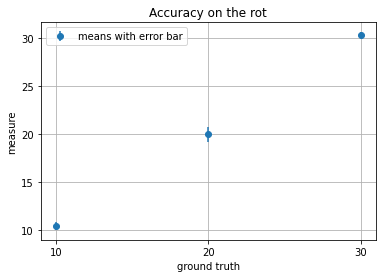

In [92]:
get_error_plot('rot')


[179.8688888888889, 195.94444444444446, 193.48555555555558] [13.08902349723275, 14.227712492800023, 23.53481894508173]


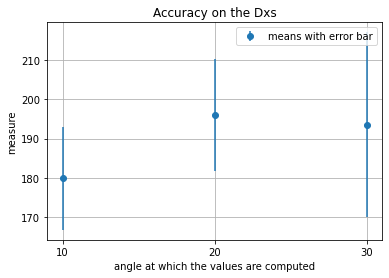

In [93]:
get_error_plot('Dxs')

[-201.64888888888885, -218.3777777777778, -207.68444444444447] [14.641977704911014, 16.095119429331508, 26.183720663377425]


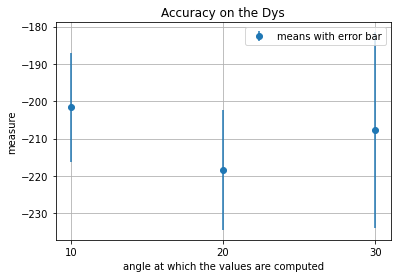

In [94]:
get_error_plot('Dys')